# Imports

In [712]:
import pandas as pd
import spacy
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.tokenize import word_tokenize
import collections

In [713]:
df=pd.read_csv('LinkedIn Job Data.csv')

In [714]:
df.sample(5)

,Job ID,Date,Company Name,Post,Location,Description,Level,Type,Function,Industry
28,2160885685,2020-09-12,Empregar Talentos,ESTÁGIO EM ENGENHARIA MECÂNICA - Betim,"Betim, Minas Gerais, Brazil","Sexo\n\nINDIFERENTE\n\nSalário\n\n800,00\n\nBe...",Internship,Full-time,EducationTraining,Marketing and AdvertisingStaffing and Recruiti...
504,1996359712,2020-08-26,Elsys,Técnico em Engenharia SMT SR,"Manaus, Amazonas, Brazil",Descrição\nVocê que atua com controles de proc...,Associate,Full-time,Information Technology,Information Technology and ServicesHuman Resou...
550,1994763942,2020-08-26,Lyon Engenharia,Fiscal de Campo Pleno,"Canaã dos Carajás, Pará, Brazil",Requisitos\nFormação técnica relacionada à dis...,Entry level,Full-time,Accounting/AuditingFinance,Information Technology and ServicesStaffing an...
319,2158490197,2020-09-10,ASTERH Assessoria Técnica em Recursos Humanos,ANALISTA DE ENGENHARIA DE APLICAÇÕES - Bento G...,"Bento Gonçalves, Rio Grande do Sul, Brazil",Quantidade\n1 vaga\n\nEscolaridade\nEnsino Sup...,Entry level,Full-time,EngineeringInformation Technology,Food & BeveragesStaffing and RecruitingHuman R...
540,2163180115,2020-09-15,Unicesumar,Tutor ead sênior - engenharia mecânica,"Maringá, Paraná, Brazil","Irá atuar com atividades relacionadas ao ead, ...",Associate,Full-time,EducationTraining,Education ManagementStaffing and RecruitingHum...


# Análise exploratória de dados

## Location

In [715]:
df3=pd.DataFrame()

In [716]:
def estado(location):
    lst=location.split(',')
    try: return lst[1].strip()
    except IndexError: return lst[-1].strip()

df3['Location']=df['Location'].apply(estado)

In [717]:
df3['Location']=df3['Location'].str.replace('Greater Belo Horizonte','Minas Gerais') \
.replace('Greater Sao Paulo','São Paulo').replace('Greater Salvador','Nordeste') \
.replace('Greater Curitiba','Sul').replace('Greater Manaus','Norte').replace('Greater Rio de Janeiro','Rio de Janeiro') \
.replace('Brazil','NA').replace('Brazil Metropolitan Area','NA').replace('Paraiba','Paraíba')

[Text(0, 0, 'São Paulo'),
 Text(0, 0, 'Minas Gerais'),
 Text(0, 0, 'Paraná'),
 Text(0, 0, 'Rio Grande do Sul'),
 Text(0, 0, 'Rio de Janeiro'),
 Text(0, 0, 'Santa Catarina'),
 Text(0, 0, 'Pará'),
 Text(0, 0, 'Amazonas'),
 Text(0, 0, 'Mato Grosso'),
 Text(0, 0, 'Bahia')]

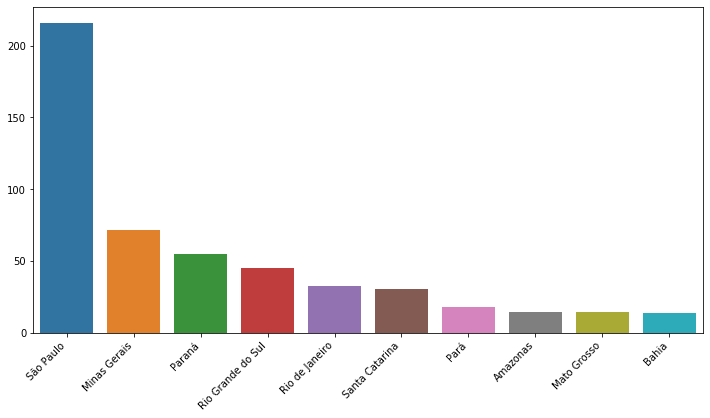

In [718]:
# 10 estados com mais vagas
plt.subplots(figsize=(12,6))
aux=df3['Location'].value_counts()[0:10]
g=sns.barplot(aux.index,aux.values)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [719]:
Nordeste=['Maranhão','Piauí','Ceará','Rio Grande do Norte','Paraíba','Pernambuco','Alagoas','Sergipe','Bahia']
Sul=['Paraná','Santa Catarina','Rio Grande do Sul']
Norte=['Amazonas','Pará','Tocantins','Rondônia','Acre','Amapá','Roraima']
Centro_Oeste=['Mato Grosso','Mato Grosso do Sul','Goiás','Distrito Federal','Federal District']
Sudeste=['Minas Gerais','Rio de Janeiro','Espírito Santo','São Paulo']

df3['Location']=df3['Location'].apply(lambda x: 'Nordeste' if x in Nordeste else x)
df3['Location']=df3['Location'].apply(lambda x: 'Sul' if x in Sul else x)
df3['Location']=df3['Location'].apply(lambda x: 'Norte' if x in Norte else x)
df3['Location']=df3['Location'].apply(lambda x: 'Centro_Oeste' if x in Centro_Oeste else x)
df3['Location']=df3['Location'].apply(lambda x: 'Sudeste' if x in Sudeste else x)

[Text(0, 0, 'Sudeste'),
 Text(0, 0, 'Sul'),
 Text(0, 0, 'Nordeste'),
 Text(0, 0, 'Centro_Oeste'),
 Text(0, 0, 'Norte')]

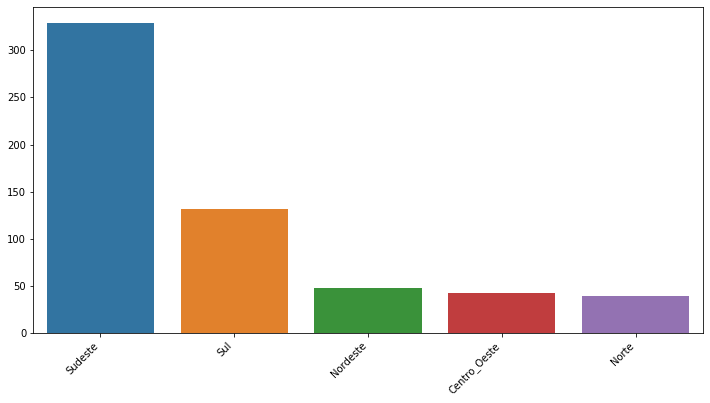

In [720]:
# Distribuição de vagas nos estados
plt.subplots(figsize=(12,6))
aux=df3['Location'].value_counts()[0:5]
g=sns.barplot(aux.index,aux.values)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

## Function

In [721]:
df2=pd.DataFrame()

In [722]:
df2['Project Management']=df['Function'].apply(lambda x: 1 if 'Project Management' in x else 0)
df2['Engineering']=df['Function'].apply(lambda x: 1 if 'Engineering' in x else 0)
df2['Information Technology']=df['Function'].apply(lambda x: 1 if 'Information Technology' in x else 0)
df2['Management']=df['Function'].apply(lambda x: 1 if 'Management' in x else 0)
df2['Education']=df['Function'].apply(lambda x: 1 if 'Education' in x else 0)
df2['Other']=df['Function'].apply(lambda x: 1 if 'Other' in x else 0)
df2['Business Development']=df['Function'].apply(lambda x: 1 if 'Business Development' in x else 0)
df2['Sales']=df['Function'].apply(lambda x: 1 if 'Sales' in x else 0)
df2['Quality Assurance']=df['Function'].apply(lambda x: 1 if 'Quality Assurance' in x else 0)
df2['Administrative']=df['Function'].apply(lambda x: 1 if 'Administrative' in x else 0)
df2['DesignArt/Creative']=df['Function'].apply(lambda x: 1 if 'DesignArt/Creative' in x else 0)
df2['Purchasing']=df['Function'].apply(lambda x: 1 if 'Purchasing' in x else 0)
df2['Supply Chain']=df['Function'].apply(lambda x: 1 if 'Supply Chain' in x else 0)
df2['Manufacturing']=df['Function'].apply(lambda x: 1 if 'Manufacturing' in x else 0)
df2['Production']=df['Function'].apply(lambda x: 1 if 'Production' in x else 0)
df2['Research']=df['Function'].apply(lambda x: 1 if 'Research' in x else 0)
df2['Management']=df['Function'].apply(lambda x: 1 if (('Management' in x) and ('Project' not in x)) else 0)
df2['Analyst']=df['Function'].apply(lambda x: 1 if 'Analyst' in x else 0)

[Text(0, 0, 'Information Technology'),
 Text(0, 0, 'Engineering'),
 Text(0, 0, 'Management'),
 Text(0, 0, 'Manufacturing'),
 Text(0, 0, 'Sales'),
 Text(0, 0, 'Education'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Business Development'),
 Text(0, 0, 'Quality Assurance'),
 Text(0, 0, 'Project Management'),
 Text(0, 0, 'Administrative'),
 Text(0, 0, 'DesignArt/Creative'),
 Text(0, 0, 'Supply Chain'),
 Text(0, 0, 'Purchasing'),
 Text(0, 0, 'Production'),
 Text(0, 0, 'Analyst'),
 Text(0, 0, 'Research')]

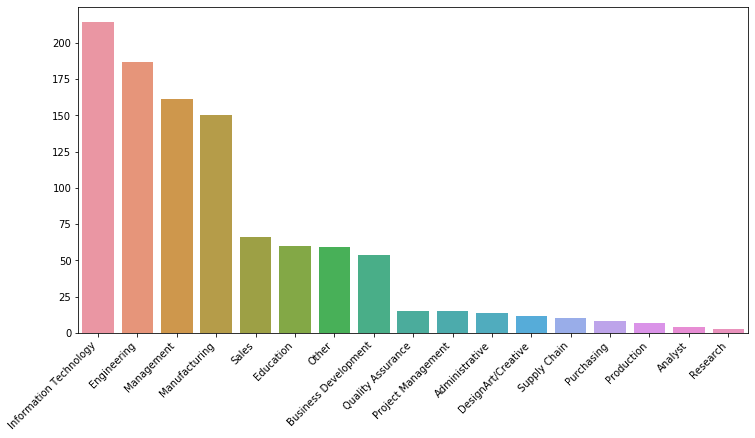

In [723]:
plt.subplots(figsize=(12,6))
aux=df2.sum().sort_values(ascending=False)
g=sns.barplot(aux.index,aux.values)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [724]:
# plt.subplots(figsize=(20,15))
# sns.heatmap(df.corr(),annot=True)

## Industry

In [725]:
df1=pd.DataFrame()

In [726]:
df1['Staffing and Recruiting']=df['Industry'].apply(lambda x: True if 'Information Technology and Services' in x else 0)
df1['Staffing and Recruiting']=df['Industry'].apply(lambda x: True if 'Staffing and Recruiting' in x else 0)
df1['Staffing and Recruiting']=df['Industry'].apply(lambda x: True if 'Human Resources' in x else 0)

df1['Food Production']=df['Industry'].apply(lambda x: True if 'Food & Beverages' in x else 0)
df1['Food Production']=df['Industry'].apply(lambda x: True if 'Food Production' in x else 0)

df1['Mechanical or Industrial Engineering']=df['Industry'].apply(lambda x: True if 'Mechanical or Industrial Engineering' in x else 0)

df1['Management Consulting']=df['Industry'].apply(lambda x: True if 'Management Consulting' in x else 0)

df1['Civil Engineering']=df['Industry'].apply(lambda x: True if 'Civil Engineering' in x else 0)
df1['Civil Engineering']=df['Industry'].apply(lambda x: True if 'Construction' in x else 0)

df1['Industrial Automation']=df['Industry'].apply(lambda x: True if 'Industrial Automation' in x else 0)
df1['Electrical/Electronic Manufacturing']=df['Industry'].apply(lambda x: True if 'Electrical/Electronic Manufacturing' in x else 0)
df1['Mining & Metals']=df['Industry'].apply(lambda x: True if 'Mining & Metals' in x else 0)
df1['Automotive']=df['Industry'].apply(lambda x: True if 'Automotive' in x else 0)
df1['Airlines/AviationAviation & Aerospace']=df['Industry'].apply(lambda x: True if 'Airlines/AviationAviation & Aerospace' in x else 0)
df1['Paper & Forest Products']=df['Industry'].apply(lambda x: True if 'Paper & Forest Products' in x else 0)
df1['Renewables & Environment']=df['Industry'].apply(lambda x: True if 'Renewables & Environment' in x else 0)
df1['Oil & Energy']=df['Industry'].apply(lambda x: True if 'Oil & Energy' in x else 0)


[Text(0, 0, 'Staffing and Recruiting'),
 Text(0, 0, 'Mechanical or Industrial Engineering'),
 Text(0, 0, 'Electrical/Electronic Manufacturing'),
 Text(0, 0, 'Civil Engineering'),
 Text(0, 0, 'Management Consulting'),
 Text(0, 0, 'Industrial Automation'),
 Text(0, 0, 'Renewables & Environment'),
 Text(0, 0, 'Food Production'),
 Text(0, 0, 'Oil & Energy'),
 Text(0, 0, 'Automotive'),
 Text(0, 0, 'Mining & Metals'),
 Text(0, 0, 'Paper & Forest Products'),
 Text(0, 0, 'Airlines/AviationAviation & Aerospace')]

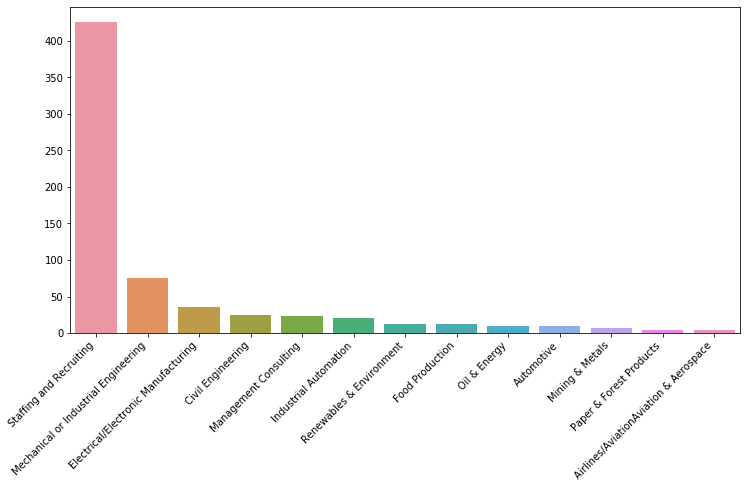

In [727]:
plt.subplots(figsize=(12,6))
aux=df1.sum().sort_values(ascending=False)
g=sns.barplot(aux.index,aux.values)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

## Description

In [728]:
df['description_length'] = df['Description'].apply(len)

In [729]:
df['description_length'].describe()

count     601.000000
mean     1259.336106
std       979.257840
min        72.000000
25%       589.000000
50%       931.000000
75%      1691.000000
max      7173.000000
Name: description_length, dtype: float64

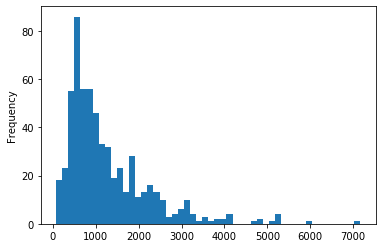

In [730]:
# Distribuição do número de caracteres da descrição da vaga
df['description_length'].plot(bins=50, kind='hist') 

In [731]:
import string

In [732]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [733]:
punctuation='!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'

In [734]:
stopwords=list(nlp.Defaults.stop_words)

### Substantivos comuns e próprios mais usados

In [735]:
# load the language library
nlp = spacy.load('pt_core_news_sm')

In [736]:
def normalize_words(mess):
    norm = [char for char in mess if char not in string.punctuation ]
    norm = ''.join(norm)
#     norm = norm.lower()
    return norm

In [737]:
Desc=df['Description'].apply(normalize_words)

In [738]:
Desc

0      Irá fazer e manter atualizado o cronograma de ...
1      ADMITE PARA SUA SEDE EM BELO HORIZONTEMINAS GE...
2      Atenção é necessário anexar seu currículo no a...
3      Formação  Superior completo em Engenharia Elét...
4      TituloGerente de Segurança do Trabalho  Belo H...
                             ...                        
596    Realizará atividades de integridade do tanque ...
597    Descrição\nCódigo 776109\nFunção Projetista\nL...
598    Vaga de Técnico Eletrônico em São Paulo A comb...
599    Cursando Engenharia de Produção Elétrica Mecân...
600    workcell rh está com 1 vagas em aberto para a ...
Name: Description, Length: 601, dtype: object

In [739]:
def filter_nouns(cell):
    # Create a Doc object
    doc = nlp(cell)
    aux=[]
    # Print each token separately
    for token in doc:
        if (token.pos_ in ['PROPN']) and (token.text not in ['Show','less']):
            aux.append(token.text)
    return aux

In [740]:
Desc=Desc.apply(filter_nouns)

In [741]:
Desc

0      [Vespasiano, São, José, Lapa, Lagoa, Santa, Pe...
1      [BELO, HORIZONTEMINAS, GERAIS, TRABALHO, Requi...
2      [N, °, Vagas, 1, Formação, Engenharia, Produçã...
3      [Superior, Engenharia, Elétrica, Mecânica, Civ...
4      [Segurança, Trabalho, Belo, Horizonte, MGDescr...
                             ...                        
596    [Médica, Assistência, Odontológica, Seguro, Fo...
597    [Código, 776109, Função, Projetista, Local, CA...
598    [Técnico, Eletrônico, São, Paulo, Período, Int...
599    [Cursando, Engenharia, Produção, Elétrica, Mec...
600    [workcell, rh, indaiatuba, sp, Controlar, Mant...
Name: Description, Length: 601, dtype: object

In [742]:
lst=[element for list_ in Desc for element in list_]
words=pd.DataFrame({'Number': lst}) 

In [743]:
top=pd.DataFrame()
for i in range(0,6):
    lim=10
    top=pd.concat([top,pd.DataFrame(words['Number'].value_counts()[(i*lim):(i*lim+lim)]).reset_index()],axis=1)

In [744]:
top

,index,Number,index,Number,index,Number,index,Number,index,Number,index,Number
0,Engenharia,912,Conhecimento,131,Empresa,105,CLT,89,Paulo,71,SAP,62
1,Mecânica,545,Período,127,São,101,Projetos,84,Job,70,Química,62
2,Superior,190,Pacote,125,and,101,Local,80,Vida,69,Description,61
3,Gestão,178,Vale,125,Excel,100,Jornada,79,Seguro,66,Transporte,60
4,Elétrica,177,Cargo,123,the,98,SP,77,Requisitos,65,of,60
5,Produção,166,Inglês,120,Trabalho,96,Graduação,75,Humanos,64,Estágio,59
6,Ensino,152,Mecatrônica,117,Plano,94,Qualidade,75,Elaborar,63,Industrial,59
7,Manutenção,147,Benefícios,117,Completo,89,Área,75,Controle,62,Assistência,56
8,Office,146,Formação,110,Horário,89,Conhecimentos,74,Segurança,62,Cursando,56
9,Integral,133,–,107,Ramo,89,Brasil,72,Recrutamento,62,Escolaridade,56


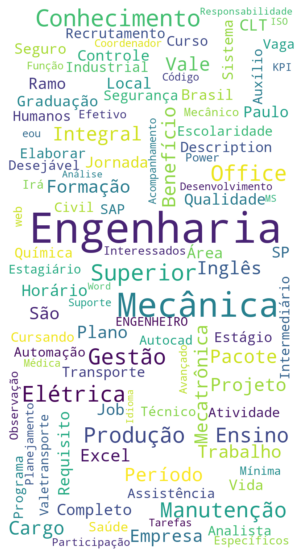

In [745]:
text=' '.join(lst)
wc= WordCloud(background_color="white", random_state=1, max_words = 100, width =800, height = 1500,collocations=False)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

### spacy.ents mais usados

In [746]:
def filter_ents(cell):
    aux=[]
    for ent in cell.ents:
        aux.append(ent.text)
    return aux

In [747]:
Desc1=df['Description'].apply(nlp).apply(filter_ents)

In [748]:
Desc1=Desc1.apply(lambda ls: [word.strip().lower() for word in ls])

In [749]:
Desc1

0      [possuir, vespasiano, são josé da lapa, lagoa ...
1      [segurança, engenharia elétrica, engenharia me...
2      [vagas, mina, civil, paraopeba, minas gerais, ...
3      [superior, engenharia elétrica, mecânica, civi...
4      [belo horizonte, mgdescricao, grupo empresaria...
                             ...                        
596    [seguro, engenharia mecânica, crea, aws, socie...
597    [descrição\ncódigo, função: projetista\nlocal ...
598    [técnico eletrônico, são paulo, período integr...
599    [cursando engenharia de produção, elétrica, me...
600    [workcell rh, indaiatuba, sp, iso, word, excel...
Name: Description, Length: 601, dtype: object

In [750]:
lst=[element for list_ in Desc1 for element in list_]
words=pd.DataFrame({'Number': lst}) 

In [751]:
words_dict=pd.DataFrame(words['Number'].value_counts()).to_dict()['Number']
keys_to_remove = ['show less','descrição\ncódigo'] 
for key in keys_to_remove:
    del words_dict[key]

In [752]:
# 'Pacote Office': 83,'Inglês': 67, 'SAP': 55,'Automação': 28,'Autocad': (16+21),'Manutenção': 19,'AutoCAD': 18,\
#                             'FMEA': 18,'SolidWorks': 14,'ISO': 12,'Power BI': 11, 'gestão de projetos':(6+6)

In [753]:
words_dict

{'engenharia mecânica': 176,
 'experiência': 133,
 'benefícios': 126,
 'conhecimento': 118,
 'mecatrônica': 84,
 'inglês': 74,
 'produção': 73,
 'excel': 73,
 'seguro de vida': 70,
 'são paulo': 66,
 'ramo': 65,
 'disponibilidade': 64,
 'pacote office': 62,
 'brasil': 61,
 'sp': 61,
 'elétrica': 60,
 'realizar': 51,
 'sap': 49,
 'acompanhar': 49,
 'período integral': 49,
 'autocad': 47,
 'desejável': 44,
 'suporte': 43,
 'efetivo': 43,
 'acompanhamento': 42,
 'elaborar': 41,
 'vale-transporte': 40,
 'vale': 39,
 'mecânica': 39,
 'engenharia': 39,
 'vivência': 38,
 'garantir': 37,
 'assistência odontológica': 36,
 'escolaridade mínima': 36,
 'química': 36,
 'engenharia - engenharia mecânica': 36,
 'participar': 36,
 'auxílio': 33,
 'qualidade': 33,
 'interessados': 33,
 'manutenção': 32,
 'clt área': 30,
 'engenharia elétrica': 30,
 'sp regime': 30,
 'gestão': 30,
 'assistência médica': 29,
 'participação': 29,
 'mg': 29,
 'iso': 27,
 'controle': 27,
 'plano odontológico': 27,
 'vale tr

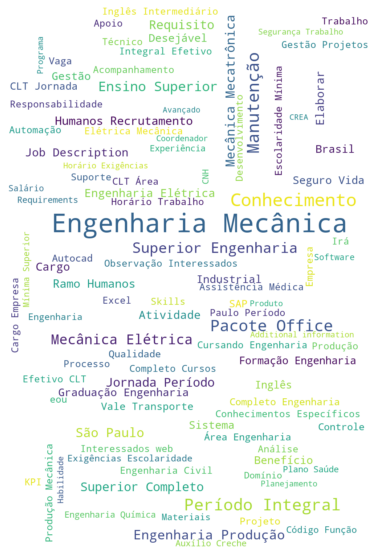

In [754]:
wc=WordCloud(background_color="white", random_state=1, max_words = 100, width =1000, height = 1500).generate_from_frequencies(words_dict)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()
# ,collocations=False

## Salary

In [760]:
def find_salary(cell):
    wordsAfter=''
    for index,token in enumerate(cell): 
        if token.text == "R$":
            wordsAfter+=cell[index:index+4].text+' '
#         elif token.text.lower() in ['salário','salario']:
#             wordsAfter+=cell[index:index+5].text
    return wordsAfter

In [761]:
Desc2=df['Description'].replace('$','$ ').apply(nlp).apply(find_salary)

In [775]:
def filter_NUM(cell):
    # Create a Doc object
    doc = nlp(cell)
    sal=''
    # Print each token separately
    for token in doc:
        if token.pos_ == 'NUM':
            sal=token.text
    return sal

In [776]:
sal=Desc2[Desc2!=''].apply(filter_NUM)
sal=sal[sal!='']

In [778]:
sal

1      16.500,00
4      16.500,00
5      16.500,00
9      16.500,00
19      1.091,00
20      2.248,00
70      2.613,00
104     4.500,00
157     5.000,00
161     4.500,00
178     4.500,00
179     5.500,00
215     5.000,00
234      bilhões
286      1739,88
310     1.000,00
320     5.000,00
323       900,00
340     1.200,00
341     6.800,00
342     8.000,00
354       685,00
356     1.739,88
378     3.500,00
386     1.259,00
387     1.300,00
405     2.000,00
416     1.000,00
421     3.500,00
427     1.000,00
443     4.028,00
450     1.300,00
491     1.800,00
501     2.000,00
515     4.000,00
522         9000
528     1.540,00
531     1.200,00
556       600,00
560     2.000,00
564     4.500,00
577     4.000,00
581       900,00
588     8.000,00
596    10.000,00
Name: Description, dtype: object

In [779]:
sal.count()

45